# Spiral Time

## The new phenomenon sweeping the nation

Spiral time is a new clock format that splits the 24 hour day into some number of new "hours", where the length of each subsequent "hour" gets shorter by a chosen factor. 

The standard for spiral time is a 16 "hour" day, where each segment gets shorter by the golden ratio:

$$ \phi = \frac{1 + \sqrt{5}}{2}$$

Typically the solutions converge to exactly 24 standard hours, though non-converging solutions can be made to converge by including one additional "hour", a "witching hour", that lasts exactly as long as needed to reach 24 standard hours.

(Lena & Ray Sharma 2020)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
def calc_spiral_time(n, N=16, phi=(1 + np.sqrt(5))/2, witching_hour=False):
    if witching_hour:
        norm = np.floor(N / sum(( 1 / phi)**np.arange(0, N, 1)))
        seg = norm * (24 / N) * (1 / phi)**np.minimum(n, N-1)
        remainder = 24 - sum(norm * (24 / N) * (1 / phi)**np.arange(0,N,1))
    else:    
        norm = N / sum(( 1 / phi)**np.arange(0, N, 1))
        seg = norm * (24 / N) * (1 / phi)**np.minimum(n, N-1)
        remainder = 0
    return seg, remainder

## Fibonacci Spiral Time

If we set the shrinking factor to the golden ratio, and divide the day into 16 hours, we get a first "hour" lasting 550 standard minutes, and a last hour lasting ~30 seconds.

    Spiral Hour  Hours/Spiral Hour  Minutes/Spiral Hour
0           1.0           9.171340           550.280390
1           2.0           5.668200           340.091985
2           3.0           3.503140           210.188406
3           4.0           2.165060           129.903579
4           5.0           1.338080            80.284827
5           6.0           0.826979            49.618752
6           7.0           0.511101            30.666075
7           8.0           0.315878            18.952677
8           9.0           0.195223            11.713398
9          10.0           0.120655             7.239278
10         11.0           0.074569             4.474120
11         12.0           0.046086             2.765158
12         13.0           0.028483             1.708962
13         14.0           0.017603             1.056196
14         15.0           0.010879             0.652765
15         16.0           0.006724             0.403431


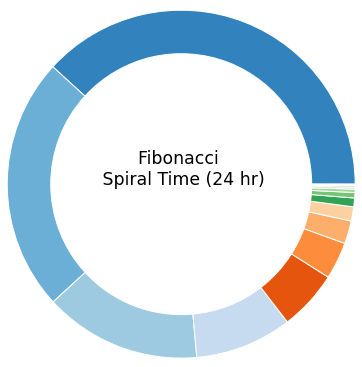

In [107]:
fig, ax = plt.subplots()

size = 0.5
x = np.arange(0, 16, 1)
y, _ = calc_spiral_time(x, N=16, witching_hour=False)

cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(len(x)))

ax.pie(y, radius=2, colors=colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal")
ax.text(0.5, 0.5, 'Fibonacci \n Spiral Time (24 hr)', fontsize='xx-large', transform=ax.transAxes, ha='center')

import matplotlib.patches as patches

style = "Simple, tail_width=0.5, head_width=4, head_length=8"
kw = dict(arrowstyle=style, color="k")

a3 = patches.FancyArrowPatch((-0.4, -0.6), (0.4, -0.6),
                             connectionstyle="arc3,rad=.5", **kw)
    
y2 = y * 60
vals = np.asarray([x+1,y,y2]).T
spiral_table = pd.DataFrame(vals, columns=['Spiral Hour', 'Hours/Spiral Hour', 'Minutes/Spiral Hour'])
print(spiral_table)

## Binary Spiral Time

If we instead set the shrinking time to 2 and divide the day into 16 hours, we get a first hour lasting ~12 hours, and each subsequent hour is halved in time. The final hour lasts approximately 1.2 seconds!

    Spiral Hour  Hours/Spiral Hour  Minutes/Spiral Hour
0           1.0          12.000183           720.010986
1           2.0           6.000092           360.005493
2           3.0           3.000046           180.002747
3           4.0           1.500023            90.001373
4           5.0           0.750011            45.000687
5           6.0           0.375006            22.500343
6           7.0           0.187503            11.250172
7           8.0           0.093751             5.625086
8           9.0           0.046876             2.812543
9          10.0           0.023438             1.406271
10         11.0           0.011719             0.703136
11         12.0           0.005859             0.351568
12         13.0           0.002930             0.175784
13         14.0           0.001465             0.087892
14         15.0           0.000732             0.043946
15         16.0           0.000366             0.021973


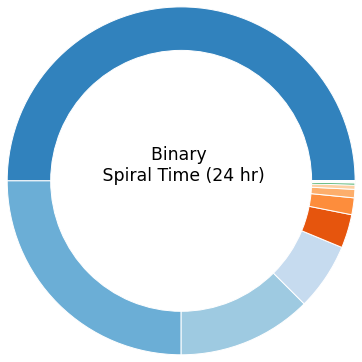

In [61]:
fig, ax = plt.subplots()

size = 0.5
x = np.arange(0, 16, 1)
y, _ = calc_spiral_time(x, N=16, phi=2, witching_hour=False)

cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(len(x)))

ax.pie(y, radius=2, colors=colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal")
ax.text(0.5, 0.5, 'Binary \n Spiral Time (24 hr)', fontsize='xx-large', transform=ax.transAxes, ha='center')

y2 = y * 60
vals = np.asarray([x+1,y,y2]).T
spiral_table = pd.DataFrame(vals, columns=['Spiral Hour', 'Hours/Spiral Hour', 'Minutes/Spiral Hour'])
print(spiral_table)

Now if we include a witching hour, the first "hour" is exactly 12 standard hours long, and the witching hour lasts as long as the last hour: 1.32 seconds.

In [88]:
size = 0.5
x = np.arange(0, 16, 1)
y, witch = calc_spiral_time(x, N=16, phi=2, witching_hour=True)

x = np.hstack([x, 16])
y = np.hstack([y, witch])

y2 = y * 60
vals = np.asarray([x+1,y,y2]).T
spiral_table = pd.DataFrame(vals, columns=['Spiral Hour', 'Hours/Spiral Hour', 'Minutes/Spiral Hour'], index=list(range(16)) + ['witch'])
print(spiral_table)

       Spiral Hour  Hours/Spiral Hour  Minutes/Spiral Hour
0              1.0          12.000000           720.000000
1              2.0           6.000000           360.000000
2              3.0           3.000000           180.000000
3              4.0           1.500000            90.000000
4              5.0           0.750000            45.000000
5              6.0           0.375000            22.500000
6              7.0           0.187500            11.250000
7              8.0           0.093750             5.625000
8              9.0           0.046875             2.812500
9             10.0           0.023438             1.406250
10            11.0           0.011719             0.703125
11            12.0           0.005859             0.351562
12            13.0           0.002930             0.175781
13            14.0           0.001465             0.087891
14            15.0           0.000732             0.043945
15            16.0           0.000366             0.0219

## Special Standard Time

Finally, rather than a spiral time, we could just split the day into 6 "hours" of equal length. Each "hour" is 4 standard hours, and the day can be qualitatively split into:

* late night (12am-4am -> 0-1)
* early morning (4am - 8am -> 1-2)
* late morning (8am - 12pm -> 2-3)
* afternoon (12pm - 4pm, -> 3-4)
* evening (4pm - 8pm, -> 4-5)
* early night (8pm - 12am, -> 5-0)

   Spiral Hour  Hours/Spiral Hour  Minutes/Spiral Hour
0          1.0                4.0                240.0
1          2.0                4.0                240.0
2          3.0                4.0                240.0
3          4.0                4.0                240.0
4          5.0                4.0                240.0
5          6.0                4.0                240.0


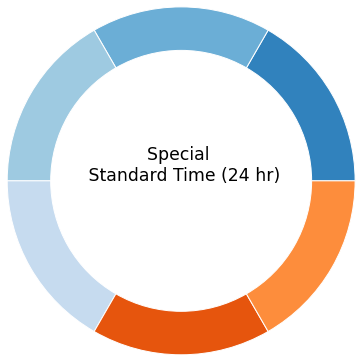

In [108]:
fig, ax = plt.subplots()

size = 0.5
x = np.arange(0, 6, 1)
y, _ = calc_spiral_time(x, N=6, phi=1, witching_hour=False)

cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(len(x)))

ax.pie(y, radius=2, colors=colors,
       wedgeprops=dict(width=size, edgecolor='w'))

ax.set(aspect="equal")
ax.text(0.5, 0.5, 'Special \n Standard Time (24 hr)', fontsize='xx-large', transform=ax.transAxes, ha='center')

y2 = y * 60
vals = np.asarray([x+1,y,y2]).T
spiral_table = pd.DataFrame(vals, columns=['Spiral Hour', 'Hours/Spiral Hour', 'Minutes/Spiral Hour'])
print(spiral_table)